In [12]:
import import_ipynb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from support_functions import generate_features_targets, plot_confusion_matrix
from accuracy_check import calculate_accuracy

In [13]:
def rf_predict_actual(data, n_estimators):
  # generate the features and targets
  features, targets = generate_features_targets(data)

  # instantiate a random forest classifier
  rfc = RandomForestClassifier(n_estimators=n_estimators)
  
  # get predictions using 10-fold cross validation with cross_val_predict
  predicted = cross_val_predict(rfc, features, targets, cv=10)

  # return the predictions and their actual classes
  return predicted, targets


Accuracy score for 25 is  0.8538461538461538
Confusion matrix, without normalization
[[202  37  21]
 [ 41 217   2]
 [ 12   1 247]]


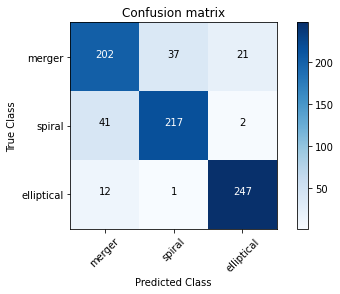

Accuracy score for 50 is  0.867948717948718
Confusion matrix, without normalization
[[215  32  13]
 [ 40 218   2]
 [ 15   1 244]]


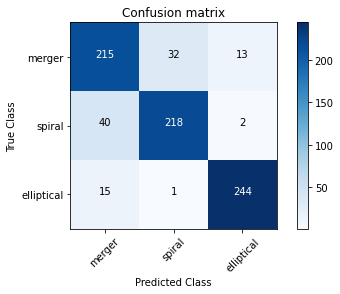

Accuracy score for 75 is  0.8602564102564103
Confusion matrix, without normalization
[[208  37  15]
 [ 41 217   2]
 [ 13   1 246]]


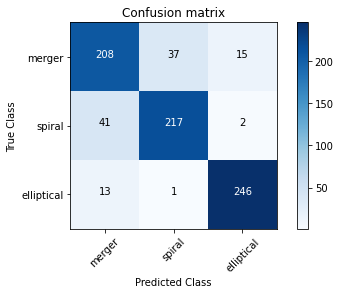

Accuracy score for 100 is  0.8628205128205129
Confusion matrix, without normalization
[[211  33  16]
 [ 42 217   1]
 [ 14   1 245]]


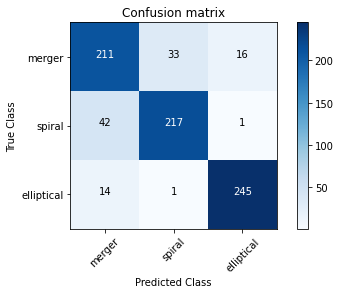

In [17]:
if __name__ == "__main__":
    data = np.load('galaxy_catalogue.npy')

    # get the predicted and actual classes
    number_estimators = [25,50,75,100]            # Number of trees
    for num in number_estimators:
        predicted, actual = rf_predict_actual(data, num)

        # calculate the model score using your function
        accuracy = calculate_accuracy(predicted, actual)
        print("Accuracy score for "+ str(num)+' is ' , accuracy)

        # calculate the models confusion matrix using sklearns confusion_matrix function
        class_labels = list(set(actual))
        model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

        # plot the confusion matrix using the provided functions.
        plt.figure()
        plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
        plt.show()
"""
For 25 - 85.38%
For 50 - 86.79%
For 75 - 86.02%
For 100 - 86.28%